In [109]:
#importing some required libraries
from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
#Mounting Google Drive on Colab 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
# Read the weather-2.csv file
dataset = pd.read_csv('/content/weather-2.csv')
names = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
         'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM','RainTomorrow']


In [112]:
# First 5 rows
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30,6,20,68,29,1019.7,1015.0,7,7,14.4,23.6,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,39,4,17,80,36,1012.4,1008.4,5,3,17.5,25.7,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,85,6,6,82,69,1009.5,1007.2,8,7,15.4,20.2,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,54,30,24,62,56,1005.5,1007.0,2,7,13.5,14.1,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,50,20,28,68,49,1018.3,1018.5,7,7,11.1,15.4,0.0,No


In [113]:
#Extracting independent and dependent
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        1464 non-null   float64
 1   MaxTemp        1464 non-null   float64
 2   Rainfall       1464 non-null   float64
 3   Evaporation    1464 non-null   float64
 4   Sunshine       1464 non-null   float64
 5   WindGustSpeed  1464 non-null   int64  
 6   WindSpeed9am   1464 non-null   int64  
 7   WindSpeed3pm   1464 non-null   int64  
 8   Humidity9am    1464 non-null   int64  
 9   Humidity3pm    1464 non-null   int64  
 10  Pressure9am    1464 non-null   float64
 11  Pressure3pm    1464 non-null   float64
 12  Cloud9am       1464 non-null   int64  
 13  Cloud3pm       1464 non-null   int64  
 14  Temp9am        1464 non-null   float64
 15  Temp3pm        1464 non-null   float64
 16  RISK_MM        1464 non-null   float64
 17  RainTomorrow   1464 non-null   object 
dtypes: float

In [115]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# feautures scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
#training prediction and evaliute the model
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# we create confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
error = []


[[236   0]
 [  0  57]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       236
         Yes       1.00      1.00      1.00        57

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



In [117]:
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

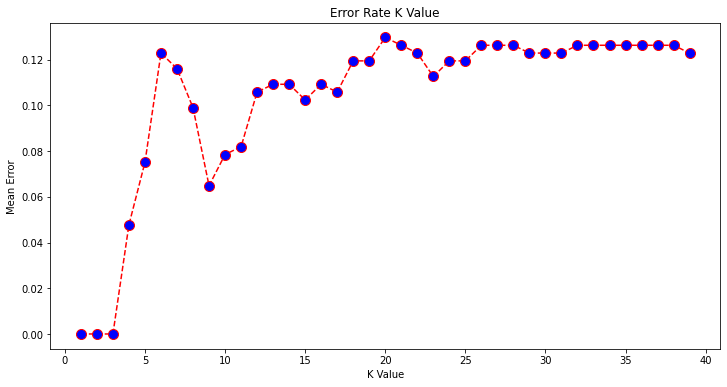

In [118]:
 # plot the graph Error rate vs K value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')